In [1]:
import pandas as pd

df = pd.read_csv('results1.csv', sep="\t", header=None)

df.columns = ['pop_size','dosing','dosing2', 'half-life', 'half-life2', 'k_max', 'k_max2', 'ec50','ec50_2', 'dose_effect_slope', 'n2', 'is_art', 'efficacy']

df['efficacy'] = df['efficacy']*100

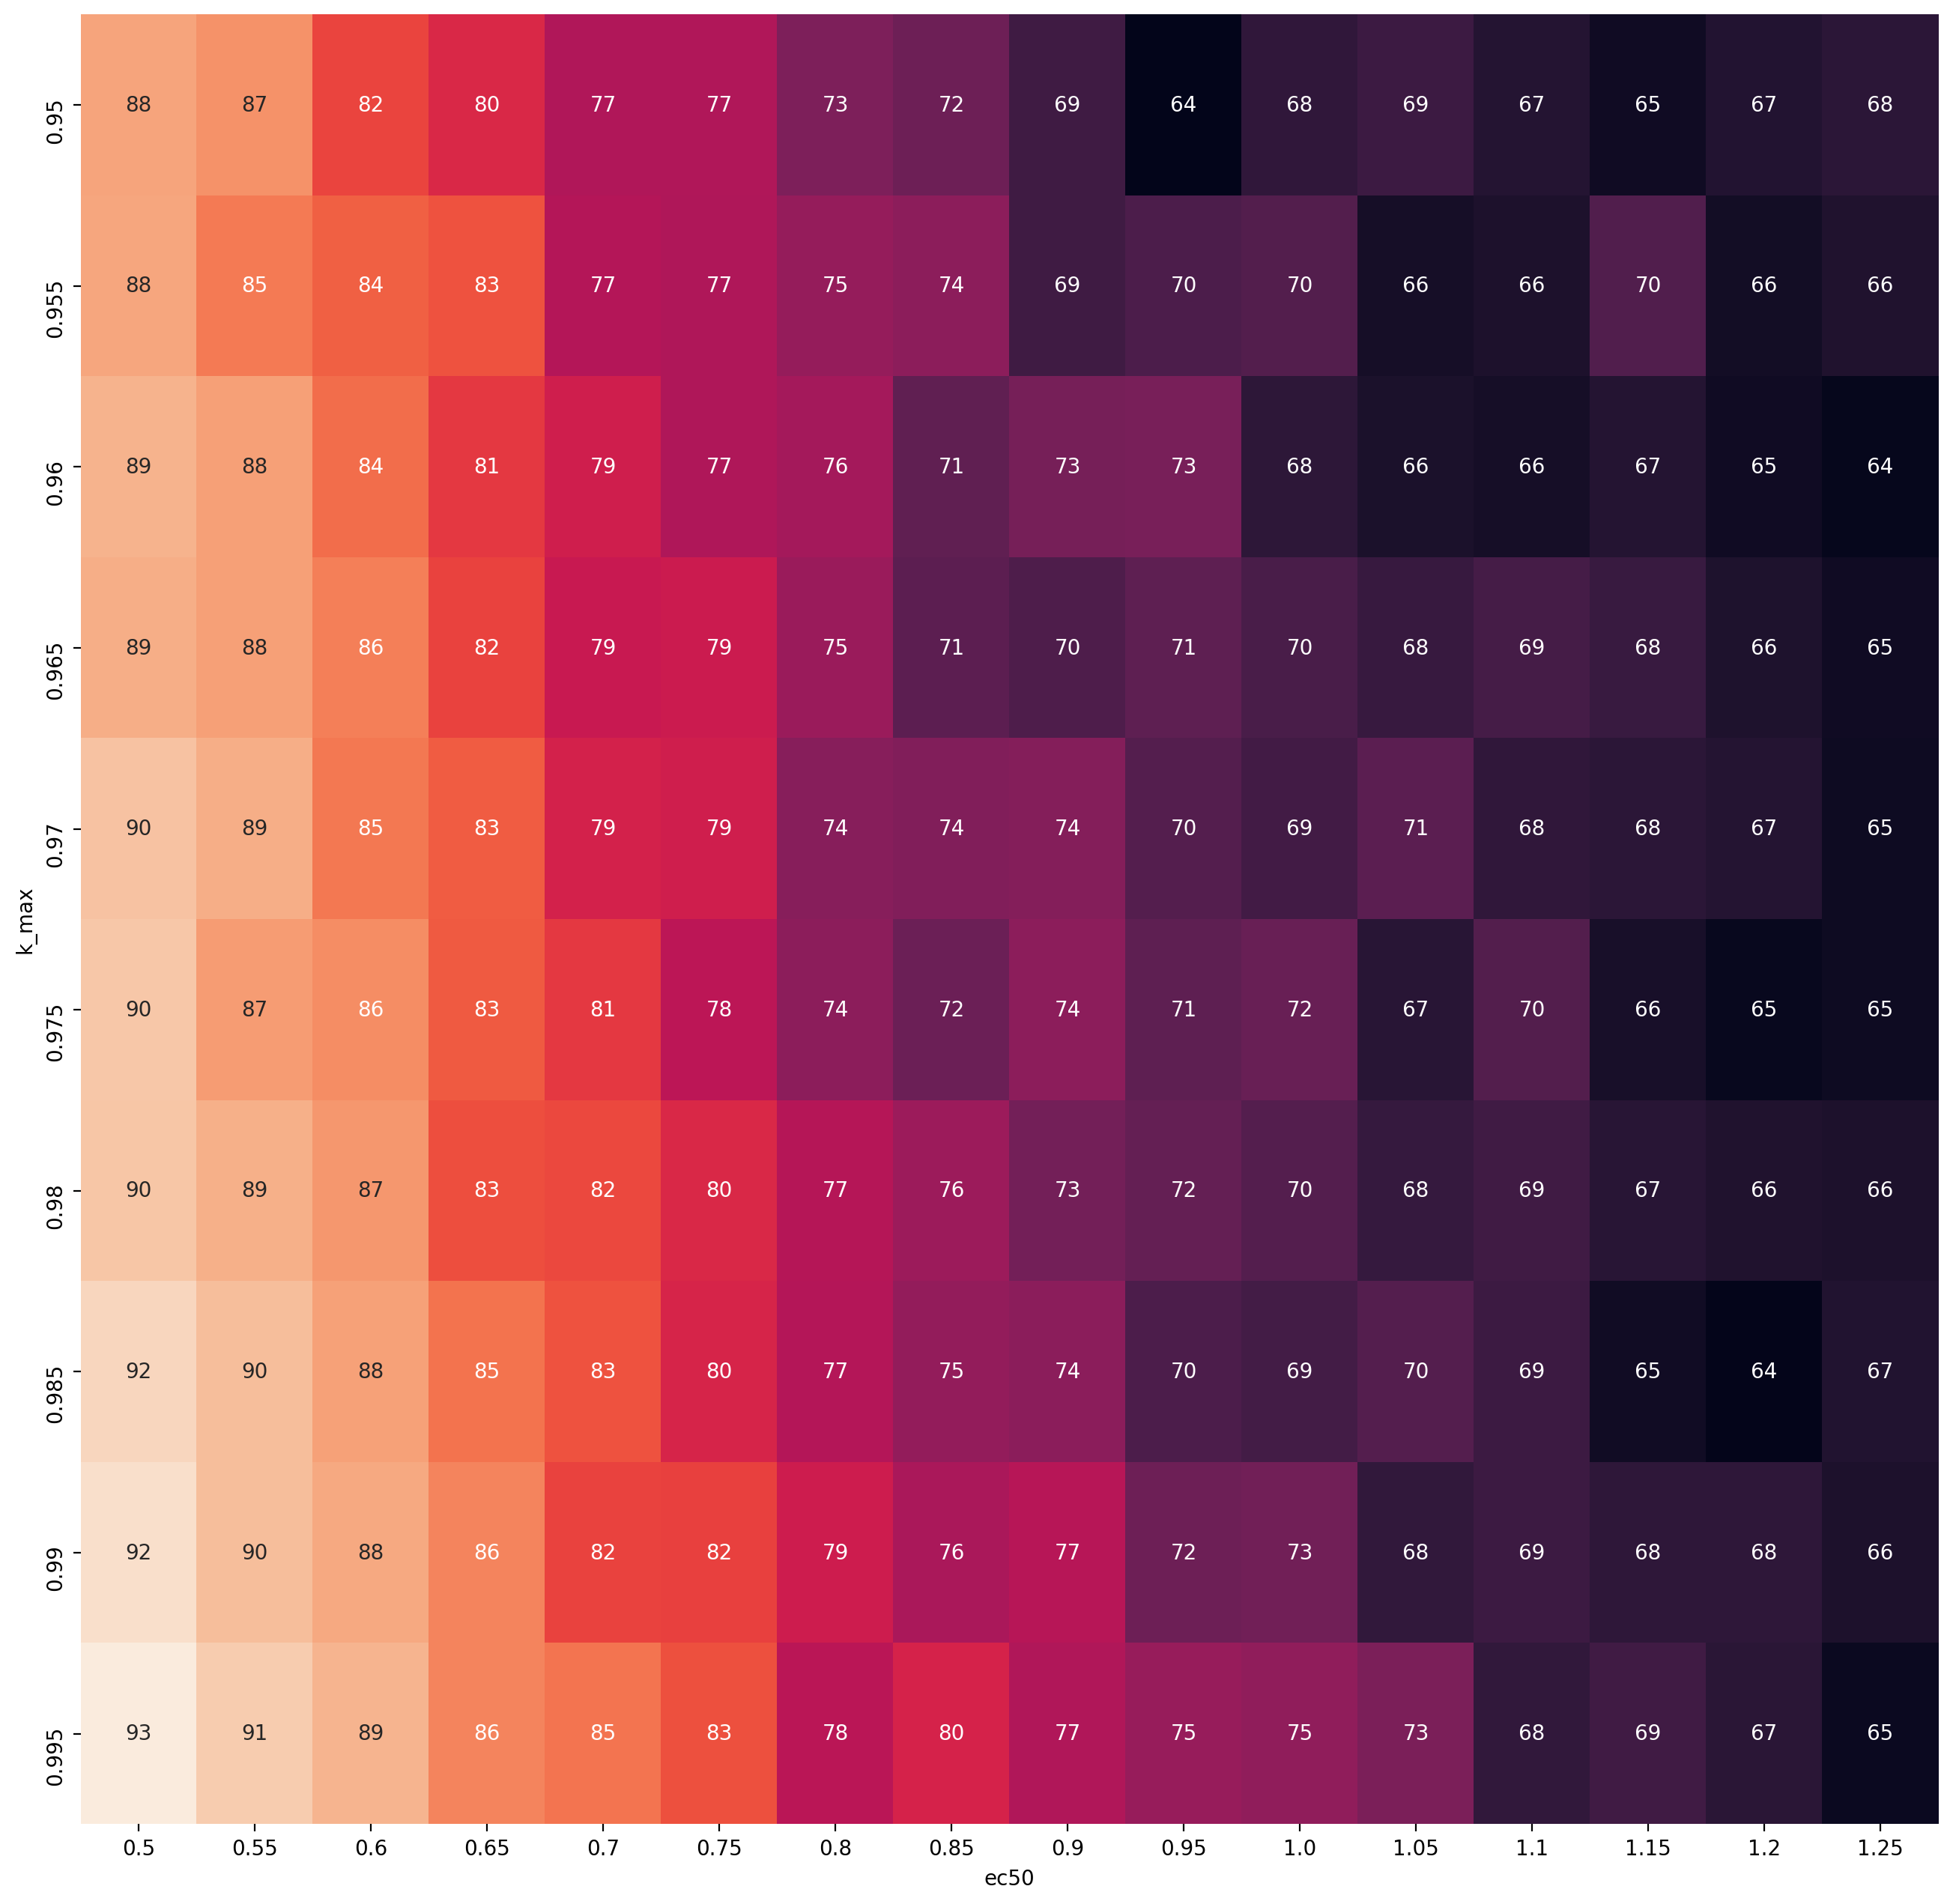

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_1day = df[(df['dosing']==1) & (df['dose_effect_slope'] == 15)]

data= df_1day.pivot_table('efficacy','k_max', 'ec50') 

ax = sns.heatmap(data, annot=True, cbar=False)

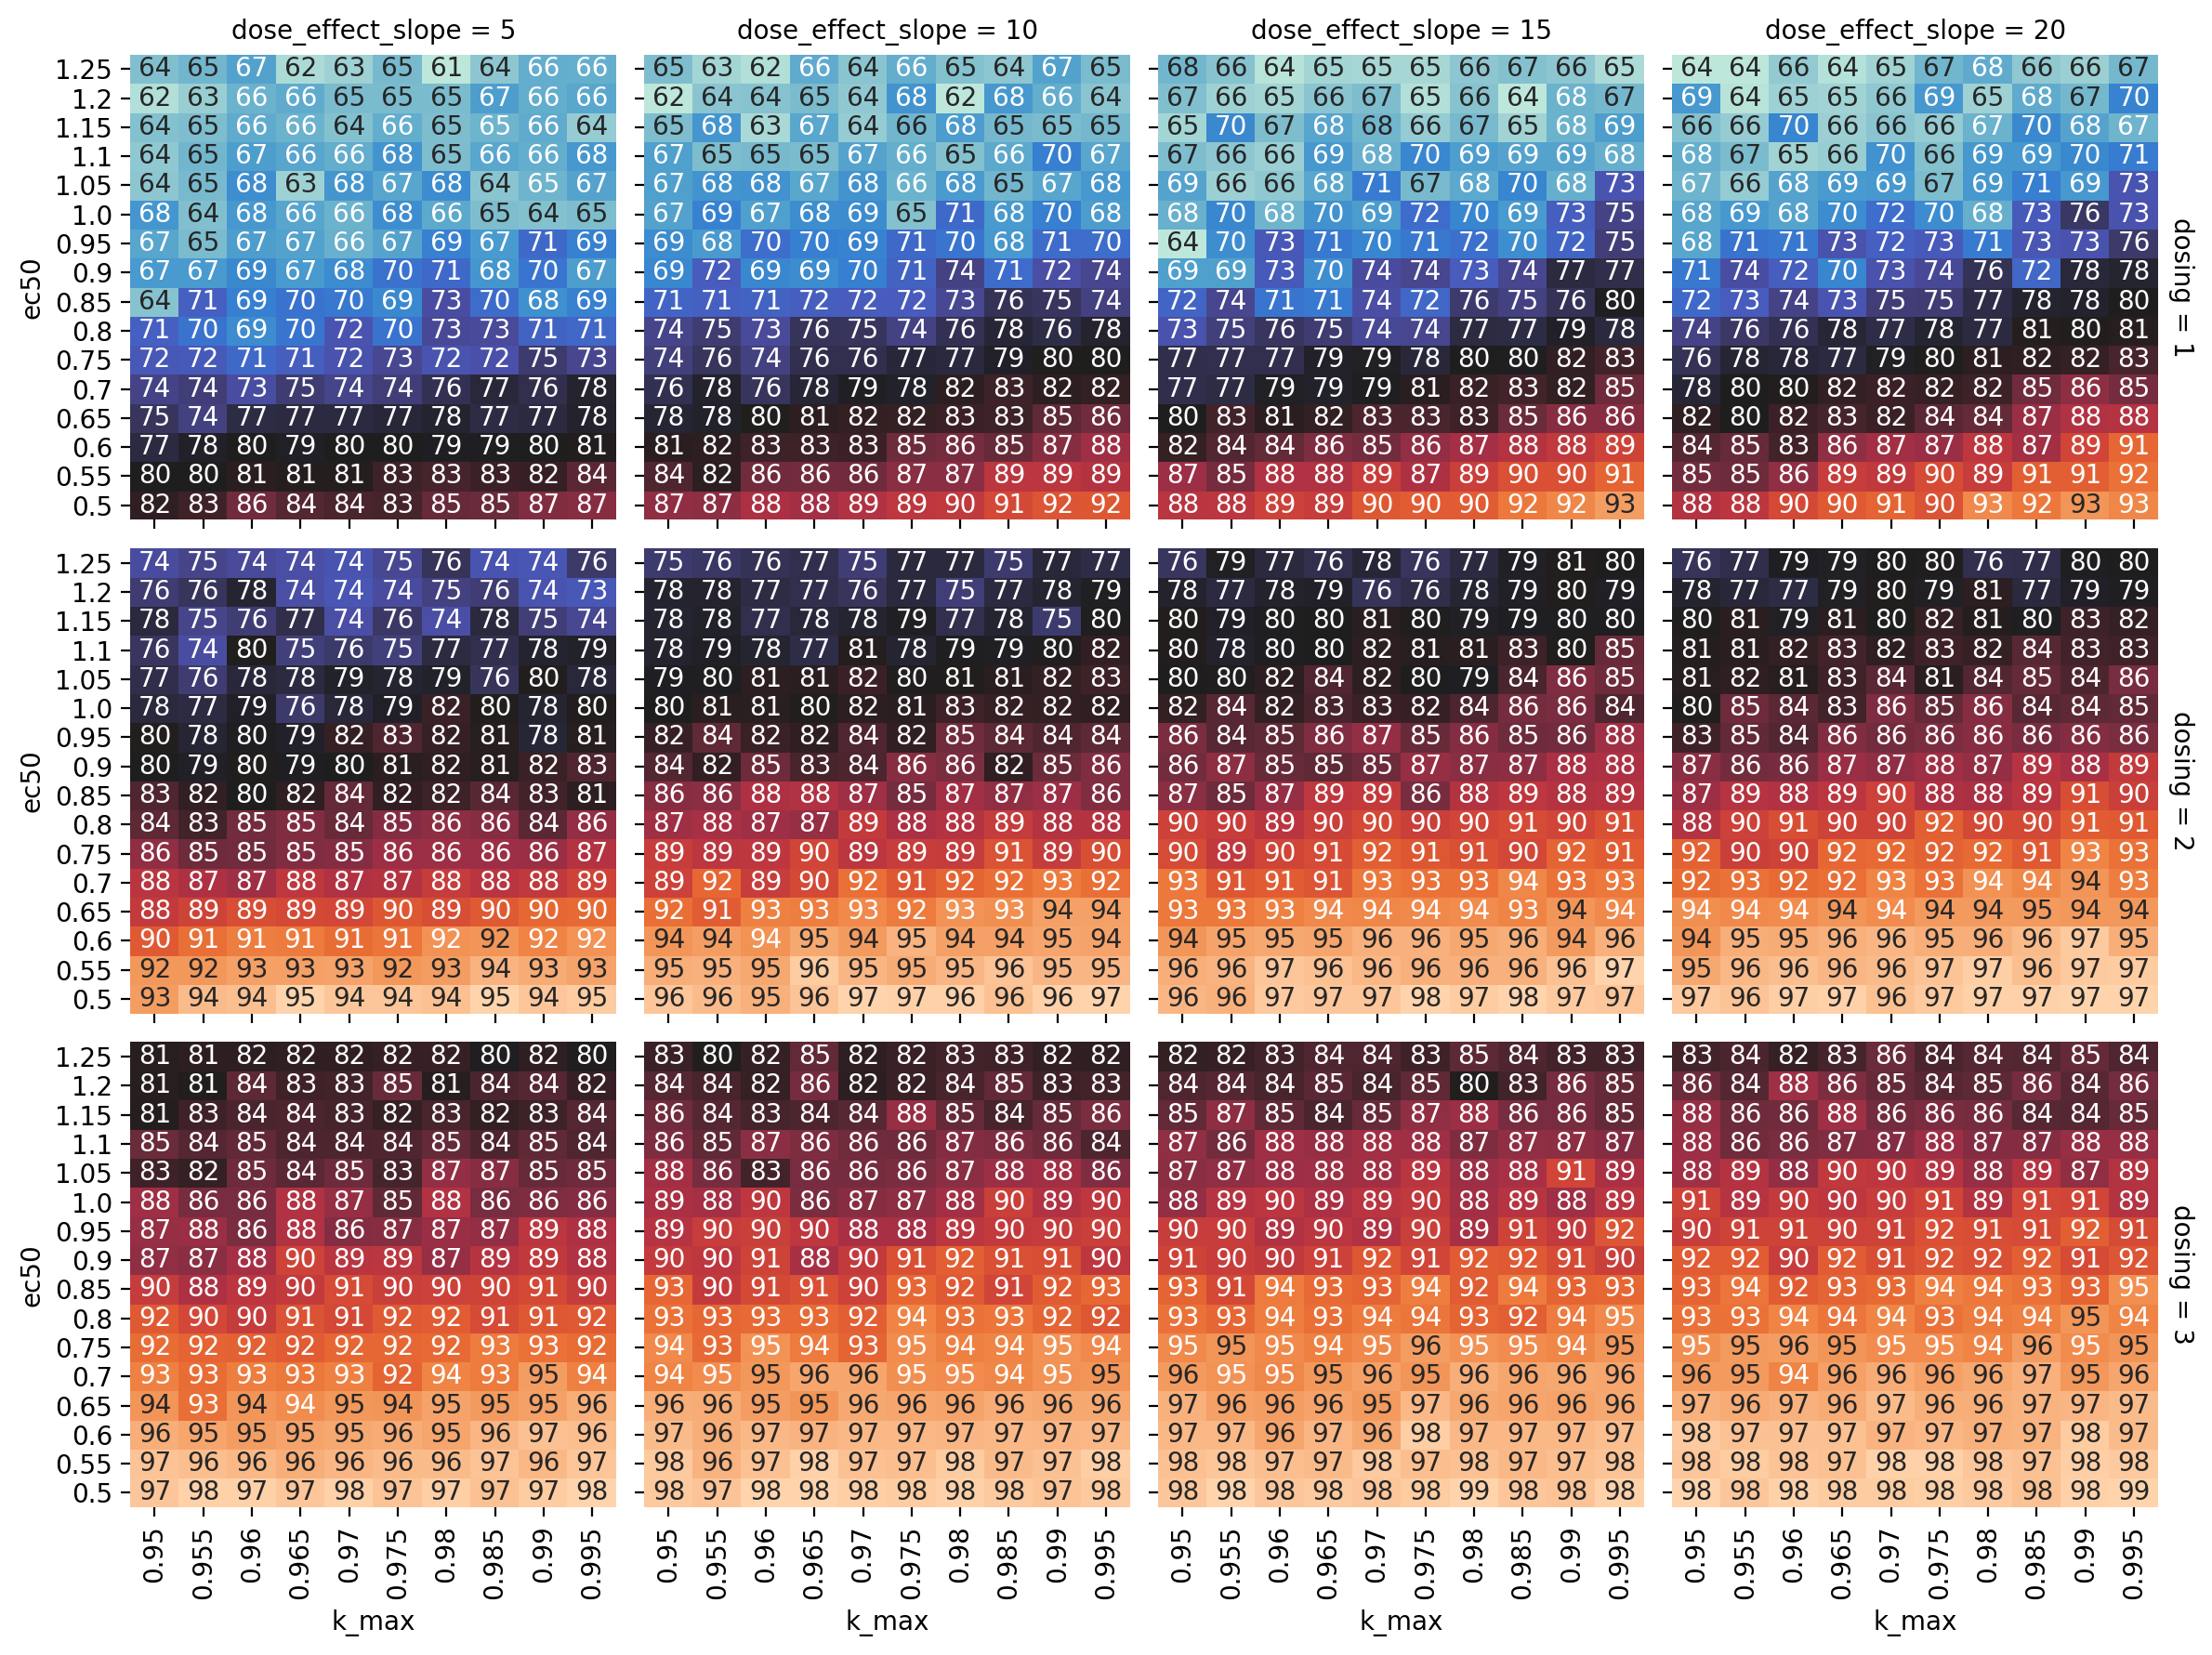

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d =  pd.pivot_table(data, values=args[0], index=[args[1]], columns=args[2])
    ax = sns.heatmap(d, **kwargs)
    ax.invert_yaxis()

plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.facecolor'] = 'w'

fg = sns.FacetGrid(df, col="dose_effect_slope", row="dosing", margin_titles=True)
fg.map_dataframe(draw_heatmap, 'efficacy', 'ec50', 'k_max', annot=True, fmt=".0f", cbar=False, center=80)
fg.set_axis_labels("k_max", "ec50")

